In [1]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio,my_util
import scipy
def amp2db(x):
    return 20 * np.log10(np.maximum(1e-5, x))
def db2amp(x):
    return np.power(10.0, x * 0.05)
my_util.wavPlayer('./my_a.wav')
my_util.wavPlayer('./my_i.wav')
my_util.wavPlayer('./my_u.wav')
my_util.wavPlayer('./my_e.wav')
my_util.wavPlayer('./my_o.wav')


C:\Users\a1989\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


18 18 18 18
(1025,)


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


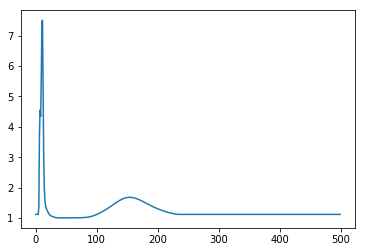

In [46]:
EQ_f_tbl = [100,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3200,4000,5000]
a2i = [0,23,22,24,24,13,6,-2,-10,-24,-24,-24,-20,-5,7,13,10,0]
a2u = [0,-2,16,15,17,20,14,9,3,9,-20,-23,-22,-21,-3,-5,0,0]
a2e = [0,0,0,0,0,8,16,10,-1,-13,-22,-10,5,0,0,0,0,0]
a2o = [0,0,0,0,0,0,11,16,16,13,-4,-16,-10,0,0,0,0,0]

print(len(a2i),len(a2u),len(a2e),len(a2o))
filter_bank = {}
for fi,f in enumerate(EQ_f_tbl):
    filter_bank[f] = a2i[fi] 
def modify_specEnv(X,curve):
    print(X.shape[0],len(curve))
    assert(X.shape[0] ==len(curve))
    for i in range(X.shape[1]):
        X[:,i] *= curve 
    return X
def get_curve(nfft = 2048,kernel = a2i,fs = 44100):
    freq_X = np.fft.fftfreq(nfft, d=1/fs)[:int(nfft/2)+1]
    curve = scipy.interpolate.spline(EQ_f_tbl,kernel,freq_X)
    return db2amp(curve)
curve = get_curve(2048,a2i)
curve = db2amp(curve)
print(curve.shape)
plt.plot(curve[:500])
plt.show()

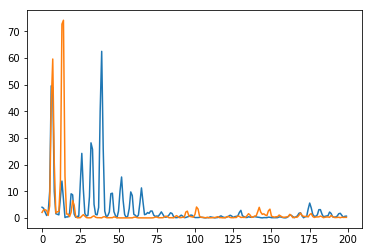

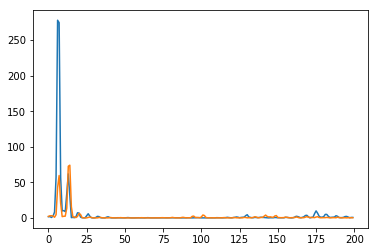

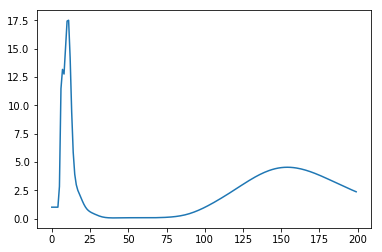

In [48]:
x,fs = sf.read('my_a.wav')
xi,fs = sf.read('my_i.wav')
foo,fs = sf.read('foo.wav')

frame_period = 10
X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
Xi = librosa.stft(xi,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))

absX = np.abs(X)
absXi = np.abs(Xi)
absFi = np.abs(Fi)

plt.plot(absX[:200,10])
plt.plot(absXi[:200,10])
plt.show()

plt.plot(absFi[:200,10])
plt.plot(absXi[:200,10])
plt.show()

plt.plot(curve[:200])
plt.show()

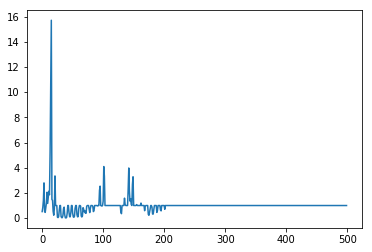

In [24]:
_absX = np.maximum(absX,1)
_absXi = np.maximum(absXi,1)
plt.plot(_absXi[:500,10] / _absX[:500,10])
plt.show()

In [47]:
x,fs = sf.read('my_a.wav')
frame_period = 10
X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
print(X.shape)

absX = np.abs(X)
phaX = X/absX

curve = get_curve(2048,a2i)
absX = modify_specEnv(absX,curve)

xx = librosa.istft(absX*phaX,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.6
sf.write('foo.wav', xx, fs)
my_util.wavPlayer('./foo.wav')

(1025, 201)
1025 1025


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


In [10]:
np.angle(X[2,2])

3.076227903366089

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


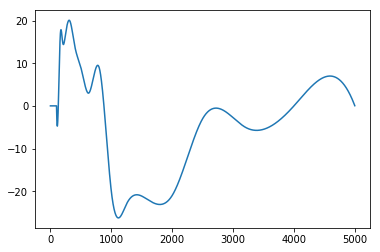

In [4]:

test = range(0,5000)
curve = scipy.interpolate.spline(EQ_f_tbl,a2u,test)
plt.plot(curve)
plt.show()

In [27]:
np.fft.fftfreq(2048, d=1/fs)[:int(2048/2)]

array([0.00000000e+00, 2.15332031e+01, 4.30664062e+01, ...,
       2.19854004e+04, 2.20069336e+04, 2.20284668e+04])

(201, 80)


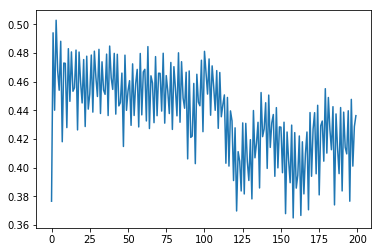

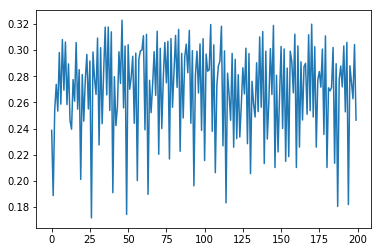

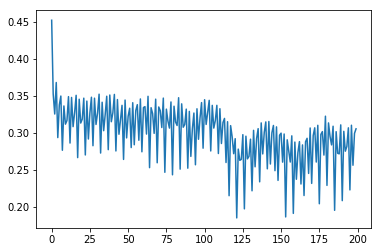

In [39]:
mel= audio.melspectrogram(x).astype(np.float32).T
mel_i= audio.melspectrogram(xi).astype(np.float32).T

print(mel.shape)
plt.plot(mel[:200,10])
plt.show()
plt.plot(mel_i[:200,10])
plt.show()
foo,fs = sf.read('foo.wav')
foo_i= audio.melspectrogram(foo).astype(np.float32).T
plt.plot(foo_i[:200,10])
plt.show()

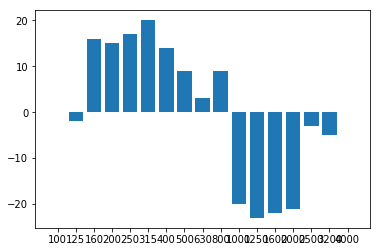

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = a2u

bars = EQ_f_tbl

y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()
 

In [32]:
t[2]

1

In [23]:
def toDB(x):
    return 20*np.log10(x)
toDB(0.15)

-16.478174818886377

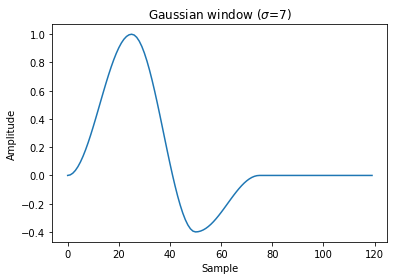

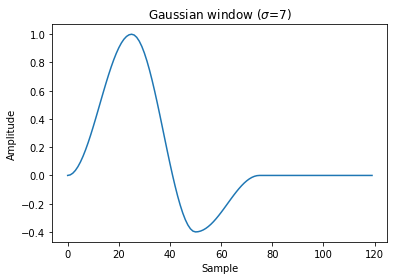

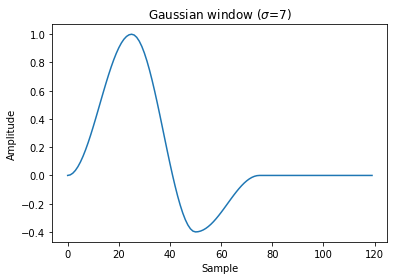

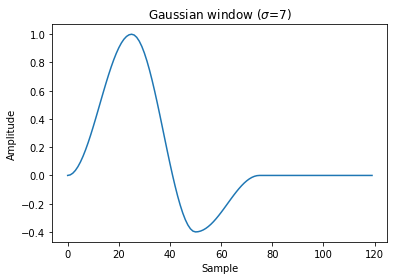

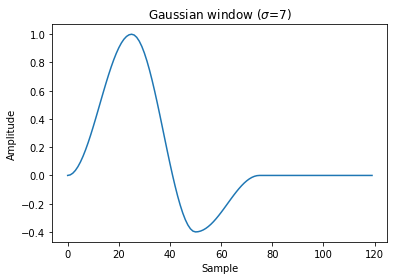

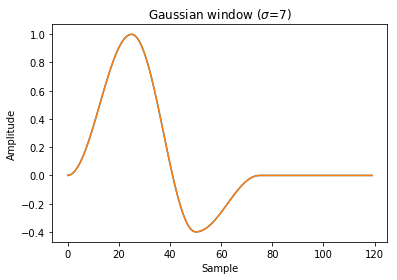

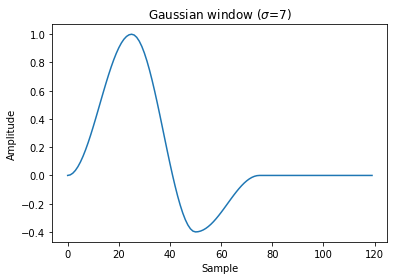

<Figure size 432x288 with 0 Axes>

In [19]:
from scipy import signal
from scipy.fftpack import fft, fftshift

# window = signal.gaussian(51, std=7)
window = np.hanning(51)
x = np.zeros((120,))
x[25-25:25+25+1] = window
x[50-25:50+25+1] -= window*0.4

plt.plot(x)


plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
plt.show()


In [20]:
xlog = np.zeros((120,))
f =range(120)
for i in range(len(xlog)):
    xlog[i] = np.interp(i**1.5, f, x)

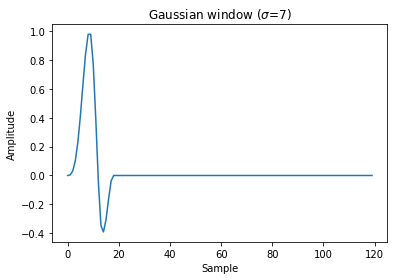

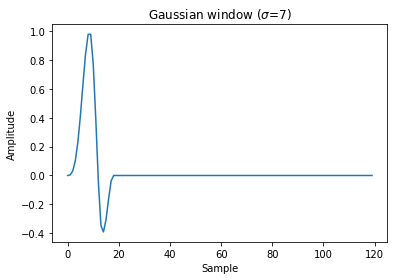

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(xlog)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.figure()
plt.show()